Index:190098M
Name: CHAMARA RPO

In [17]:
import numpy as np
from plyfile import PlyData,PlyElement
import matplotlib.pyplot as plt

pcd = PlyData.read("airplane.ply")
assert pcd is not None

points = np.concatenate((pcd['vertex']['x'].reshape(1, -1), pcd['vertex']['y'].reshape(1, -1), pcd['vertex']['z'].reshape(1, -1)), axis=0)
points = points - np.mean(points,axis=1).reshape(3,1)


Text(0.5, 0, 'z')

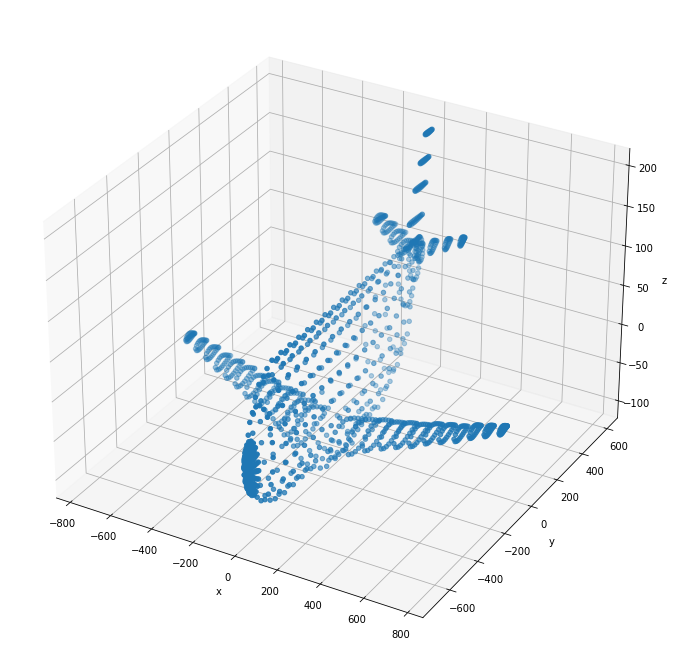

In [20]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111,projection='3d')
ax.scatter(points[0,:],points[1,:],points[2,:])
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

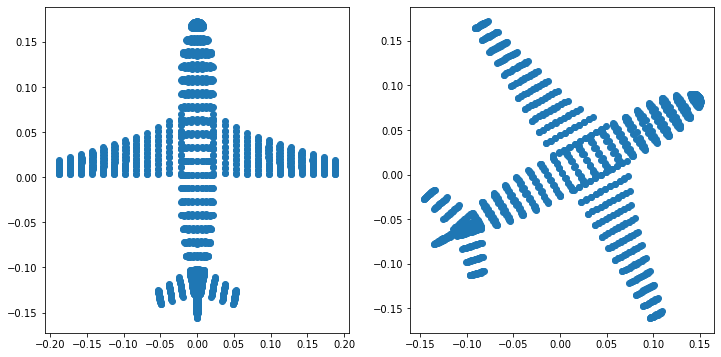

In [22]:
ones = np.ones((1,points.shape[1]))
x = np.concatenate((points,ones),axis=0)
R = np.array([[1,0,0],[0,1,0],[0,0,1]])
K = np.array([[1,0,0],[0,1,0],[0,0,1]])
t = np.array([[0],[0],[-4000]])
p1 = K@np.concatenate((R,t),axis = 1)
x1 = p1@x
a = 0.5
b = 0.5*np.sqrt(3)

R = np.array([[0,1,0],[1,0,0],[0,0,1]])
K = np.array([[b,-a,0],[a,b,0],[0,0,1]])
P2 = K@np.concatenate((R,t),axis=1)
x2 = P2@x


x1 = x1/x1[2,:]
x2 = x2/x2[2,:]

fig,ax = plt.subplots(1,2,figsize=(12,6))
ax[0].scatter(x1[0,:],x1[1,:])
ax[1].scatter(x2[0,:],x2[1,:])
#ax.axis('equal')
plt.show()

Item 1 ,area in pixels =  59143
Item 1 ,area in pixels =  2318.642172
Item 2 ,area in pixels =  59211
Item 2 ,area in pixels =  2321.3080440000003


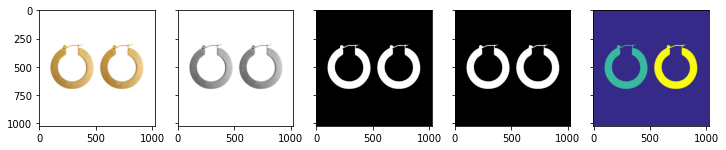

In [68]:
#Q03
import cv2 as cv 
import numpy as np
from matplotlib.colors import hsv_to_rgb
im = cv.imread(r'earrings.jpg',cv.IMREAD_COLOR)
assert im is not None

hsv = cv.cvtColor(im,cv.COLOR_BGR2HSV)
th,bw = cv.threshold(hsv[:,:,1],0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
#rgb = hsv_to_rgb(hsv)

w = 5
kernel = np.ones((w,w),np.uint8)
opened = cv.morphologyEx(bw, cv.MORPH_CLOSE,kernel)

retval,labels,stats, centroids = cv.connectedComponentsWithStats(bw)
colormapped = cv.applyColorMap((labels/np.amax(labels)*255).astype('uint8'),cv.COLORMAP_PARULA)

z=720
f=8
for i,s in enumerate(stats):
    if i!=0:
        print('Item',i,',area in pixels = ',s[4])
        print('Item',i,',area in pixels = ',s[4]*(2.2e-3)**2*(z*z)/(f*f))

fig,axes=plt.subplots(1,5,sharex='all',sharey='all',figsize=(12,6))
img = cv.cvtColor(im,cv.COLOR_BGR2RGB)
hsv = cv.cvtColor(hsv,cv.COLOR_HSV2RGB)
bw = cv.cvtColor(bw,cv.COLOR_BGR2RGB)
opened = cv.cvtColor(opened,cv.COLOR_BGR2RGB)
colormapped = cv.cvtColor(colormapped,cv.COLOR_BGR2RGB)

axes[0].imshow(img)
axes[1].imshow(hsv[:,:,1],cmap = "gray")
axes[2].imshow(bw)
axes[3].imshow(opened)
axes[4].imshow(colormapped)

plt.show()